In [1]:
print("Object Classification")
print("Rahul Kumar  Nikhil Ranjan \n631057       6316049")
print("---------------------------")
print("Requrements:-")
print("-------------")
print("Please provide the Directory(path) DataDir and Test_Data_Dir path for Training and Testing Data")
print("-----------------------------")
print("OutPut:-")
print("--------")
print("For see the Output Prediction.csv file or see the Real Image vs Prediction Graph")
print(".............................")
print(".............................")



Object Classification
Rahul Kumar  Nikhil Ranjan 
631057       6316049
---------------------------
Requrements:-
-------------
Please provide the Directory(path) DataDir and Test_Data_Dir path for Training and Testing Data
-----------------------------
OutPut:-
--------
For see the Output Prediction.csv file or see the Real Image vs Prediction Graph
.............................
.............................


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from keras.models import Sequential
%matplotlib inline
import pickle

from keras.layers import Dense, Dropout,Activation,Flatten
from keras.layers import Convolution2D,MaxPooling2D
from keras.utils import np_utils
%matplotlib inline 

C:\Users\RAHUL TIWARI\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
DataDir="C:/Users/RAHUL TIWARI/Desktop/iitk/Object classification/train"
Categories=['Cycle','Car','None','Person']

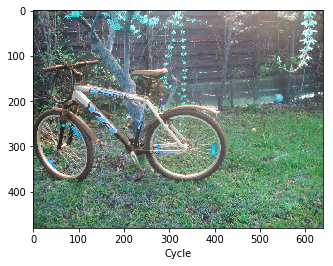

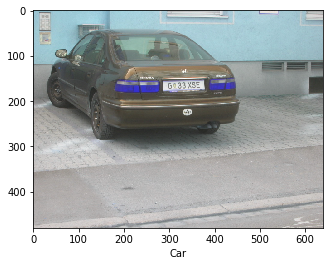

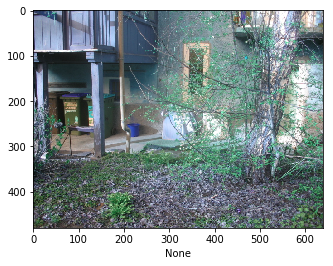

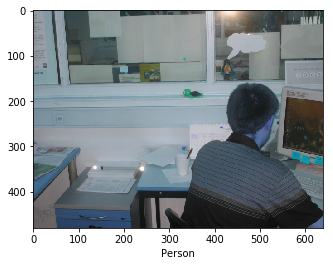

In [4]:
for category in Categories:
    path=os.path.join(DataDir,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.xlabel(category)
        plt.show()
        break

In [5]:
training_data=[]
def prepare_training_data():   #Read image from given path and append in list
    for category in Categories:
        path = os.path.join(DataDir, category)
        class_num=Categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(200,200))
                training_data.append([new_array,class_num])
            except Exception as e:
                print("The Exception happen in reading the image:= ",e)
prepare_training_data()
print("Resize Trainig Data")
print(training_data[0])
print("Length of the Training Data = ",len(training_data))

Resize Trainig Data
[array([[ 63,  63,  62, ..., 128, 103,  93],
       [ 61,  66,  66, ..., 108, 115, 115],
       [ 82,  77,  79, ..., 122, 156, 116],
       ...,
       [ 89,  85,  63, ...,  94, 101, 110],
       [ 71,  83,  73, ..., 111, 130,  93],
       [ 74,  69,  87, ..., 120, 123, 138]], dtype=uint8), 0]
Length of the Training Data =  1399


In [6]:
import random
random.shuffle(training_data)

In [7]:
x=[]    #for storing the image data and corrosponding image
y=[]

In [8]:
for features,label in training_data:     #Storing the image and labels in x and y
    x.append([features])
    y.append(label)
x=np.array(x).reshape(len(x),1,200,200)

In [9]:
 #load data in pickle
pickle_out=open("x.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [10]:
pickle_in=open("x.pickle","rb")  #load the x from pickle data 
x=pickle.load(pickle_in)
pickle_in=open("y.pickle","rb")  #load the y from pickle data 
y=pickle.load(pickle_in)
x=x/255.0
x.shape
y=np_utils.to_categorical(y,4)
print("done")

done


In [11]:
model=Sequential()  #model adding

model.add(Convolution2D(64,(3,3),activation='relu',input_shape=(1,200,200),data_format='channels_first'))
#convolution

model.add(MaxPooling2D(pool_size=(2,2,)))
#for max pooling

model.add(Flatten())
#for Dimension Reducing

model.add(Dense(128,activation='relu'))
#activation function and first nodes are added

model.add(Dropout(0.4))
#droupout(node breaking)
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16,activation='relu'))
model.add(Dense(4,activation='softmax'))
#help(model.compile)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model_fit=model.fit(x,y,batch_size=6,epochs=10,verbose=1)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
1399/1399 [==============================] - 488s 349ms/step - loss: 2.2490 - acc: 0.2838
Epoch 2/10
1399/1399 [==============================] - 404s 289ms/step - loss: 1.2919 - acc: 0.4074
Epoch 3/10
1399/1399 [==============================] - 406s 290ms/step - loss: 1.1072 - acc: 0.5275
Epoch 4/10
1399/1399 [==============================] - 450s 322ms/step - loss: 0.8093 - acc: 0.7112
Epoch 5/10
1399/1399 [==============================] - 481s 344ms/step - loss: 0.4122 - acc: 0.8649
Epoch 6/10
1399/1399 [==============================] - 488s 349ms/step - loss: 0.2037 - acc: 0.9435
Epoch 7/10
1399/1399 [==============================] - 436s 312ms/step - loss: 0.1648 - acc: 0.9535
Epoch 8/10
1399/1399 [==============================] - 43

In [12]:
#summary of the model
summery=model.summary()
print(summery)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 198, 198)      640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 99, 198)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 627264)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               80289920  
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
__________

In [13]:
model.save("saved_model.hs")

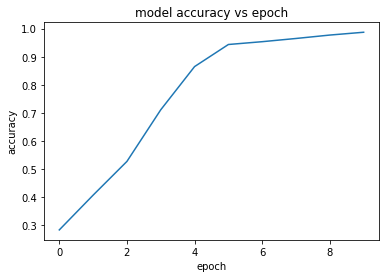

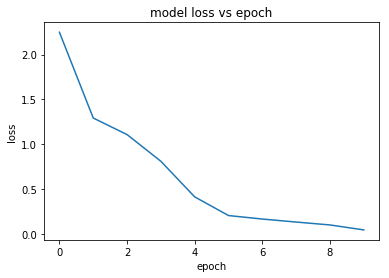

In [14]:
#Graph ploting betwwen epach vs accuracy and eppoch vs loss
#sumarize the history for accuracy
plt.plot(model_fit.history['acc'])
plt.title('model accuracy vs epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
# summarize history for loss
plt.plot(model_fit.history['loss'])
plt.title('model loss vs epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [15]:
from keras.models import load_model
loaded_model=load_model("saved_model.hs")

In [16]:
#prediction of img for give path in Test_Data_Dir
Test_Data_Dir="C:/Users/RAHUL TIWARI/Desktop/iitk/Object classification/private_scoring"
prediction_list=[]
def prepare_prediction_data(filepath):
    for img in os.listdir(filepath):
        img_array=cv2.imread(os.path.join(filepath, img),cv2.IMREAD_GRAYSCALE)
        resize_image=cv2.resize(img_array,(200,200))
        prediction_list.append([resize_image])
    new_array=np.array(prediction_list)
    return new_array.reshape(len(prediction_list),1,200,200)
prediction=loaded_model.predict([prepare_prediction_data(Test_Data_Dir)])
#print(prediction)
image_index=[]
for img_array in prediction:
    for img_label_index in range(len(img_array)):
        if(img_array[img_label_index]==1):
            image_index.append(img_label_index)
            print(img_label_index)


error: OpenCV(3.4.1) C:\Miniconda3\conda-bld\opencv-suite_1533128839831\work\modules\imgproc\src\resize.cpp:4044: error: (-215) ssize.width > 0 && ssize.height > 0 in function cv::resize


In [ ]:
#Graph ploting image vs prediction
image_for_plot=[]   #image list for ploting
image_name=[]    #for storing the index of the category(predicted)
i=0
print("Real Image vs Prediction")
print("-----------------------------------")
print("-----------------------------------")
def prepare_plot_data(filepath):
    for img,label in zip(os.listdir(filepath),image_index):
        image_name.append(os.path.split(img)[-1])
        img_array=cv2.imread(os.path.join(filepath, img))
        plt.imshow(img_array)
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(Categories[label])
        plt.show()
    return None
prepare_plot_data("C:/Users/RAHUL TIWARI/Desktop/iitk/Object classification/private_scoring")

In [ ]:
#writing a csv file
import csv
 
myData = ["Image_Name","Image_Label"]
s=","
myFile = open('Prediction.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerow(myData)
    for im_name,im_label in zip(image_name,image_index):
        line=[im_name,Categories[im_label]]
        writer.writerow(line)
print("Writing complete")
myFile.close()

In [ ]:
# import cv2

# camera = cv2.VideoCapture(0)
# i = 0
# n=int(input("enter the no of picture want to take"))
# while i < n:
#     m=[]
#     input('Press Enter to capture')
#     return_value, image = camera.read()
#     cv2.imwrite('C:/Users/RAHUL TIWARI/Desktop/iitk/Object classification/private_scoring/opencv'+str(i)+'.jpg', image)
#     resize_image=cv2.resize(image,(200,200))
#     m.append([resize_image])
#     new_array=np.array(m)
#     new_array.reshape(len(m),1,200,200)
#     prediction=loaded_model.predict([new_array])
#     print(prediction)
    
#     i += 1
# del(camera)